In [8]:
import gymnasium as gym
import gym_pogs
import numpy as np
from PIL import Image

In [2]:
env = gym.make("HardPOGS-v0", num_nodes=20, k_nearest=2, max_steps=30, render_mode="rgb_array")
obs, info = env.reset(seed=29)

/home/bartek/miniconda3/envs/pogs/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [3]:
# obs, info

In [4]:
vec, current, target, edge_list = obs.values()

In [ ]:
def get_text_observation(obs):
    num_nodes = int(np.sqrt(len(obs["vector"]) - 2))
    adj_matrix = obs["vector"][:-2].reshape(num_nodes, num_nodes)
    description = ""
    for i, row in enumerate(adj_matrix):
        if any(row):
            neigbhors = row.nonzero()[0].tolist()
            description += f"node: {i}, neighbors: {neigbhors}\n"

    obsv = f"{description}\ncurrent node: {obs['current_node']}, target node: {obs['target_node']}"

    return obsv

In [11]:
print(get_text_observation(obs))

node: 2, neighbors: [4, 16]
node: 3, neighbors: [5, 7, 16]
node: 4, neighbors: [2]
node: 5, neighbors: [3]
node: 7, neighbors: [3]
node: 16, neighbors: [2, 3]

current node: 16, target node: 11


In [5]:
current, target 

(16, 11)

In [6]:
edge_list

{(2, 4), (2, 16), (3, 5), (3, 7), (3, 16)}

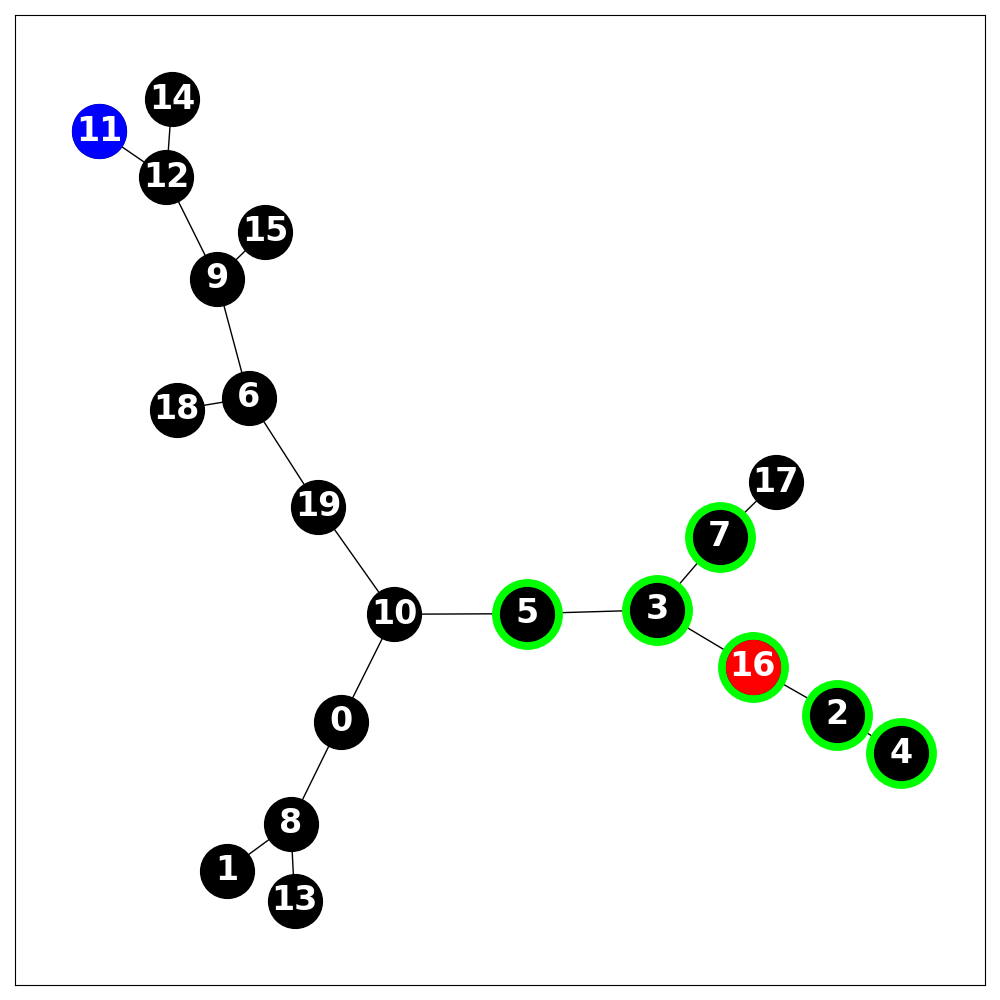

In [7]:
Image.fromarray(env.unwrapped.render())